<a href="https://colab.research.google.com/github/pletalk/deeplant-skk-proejct/blob/main/01_openCV_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV를 활용한 기본 영상처리를 위한 코드 예시
@2020-11-11/@pletalk

[변경이력]
* 2020-11-11 코드 재점검

[note]

* Google Colab에서 사용 시, 메뉴에서 런타임 > 런타임 유형변경 을 선택하고, GPU/TPU를 설정해야합니다.
* 이미지소스를 3가지로 설정가능합니다(image_src1, image_src2, image_src3)

## [0] OpenCV 설치 확인하기

In [1]:
!pip list | grep opencv

opencv-contrib-python         4.7.0.72
opencv-python                 4.7.0.72
opencv-python-headless        4.7.0.72


## [1] 라이브러리 로딩하기

In [2]:
import cv2
import os
import numpy as np

In [3]:
# 여러줄에 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## [2] 샘플 데이타(이미지/영상) 다운로드 받기

### 1> 이미지 다운로드 받기

In [6]:
image_src1 = 'https://images.unsplash.com/photo-1490750967868-88aa4486c946?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80'
image_src2 = 'https://images.unsplash.com/photo-1543466835-00a7907e9de1?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=967&q=80'
image_src3 = 'https://images.unsplash.com/photo-1561037404-61cd46aa615b?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1350&q=80'

image_source_file = image_src1

!wget -O sample_image.jpg {image_source_file}

--2023-05-20 11:12:56--  https://images.unsplash.com/photo-1490750967868-88aa4486c946?ixlib=rb-1.2.1
Resolving images.unsplash.com (images.unsplash.com)... 151.101.22.208, 2a04:4e42:5::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.22.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26784788 (26M) [image/jpeg]
Saving to: ‘sample_image.jpg’

sample_image.jpg    100%[===================>]  25.54M  --.-KB/s    in 0.09s   

2023-05-20 11:12:56 (279 MB/s) - ‘sample_image.jpg’ saved [26784788/26784788]



## [3] OpenCV를 사용해서 이미지 읽기

### 1> 이미지 파일에서 로딩하기

In [7]:
import cv2
import matplotlib.pyplot as plt

image_data_file = '/content/sample_image.jpg'
image = cv2.imread(image_data_file)

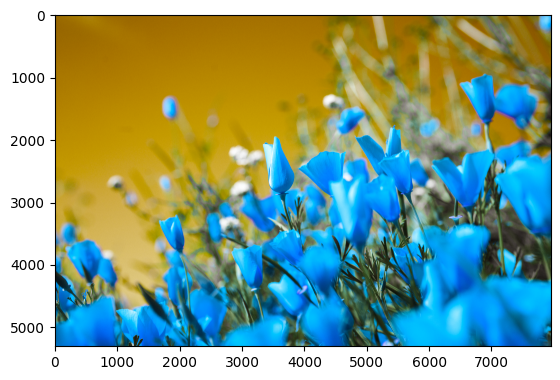

In [8]:
# 이미지를 로딩하는 경우, BGR의 형식으로 기본로딩
# RGB로 변환하여 표시하는 경우, 정상적으로 이미지가 표시

plt.imshow(image)
plt.show()

### 2> 이미지 포맷 변경하기 (BGR -> RGB)

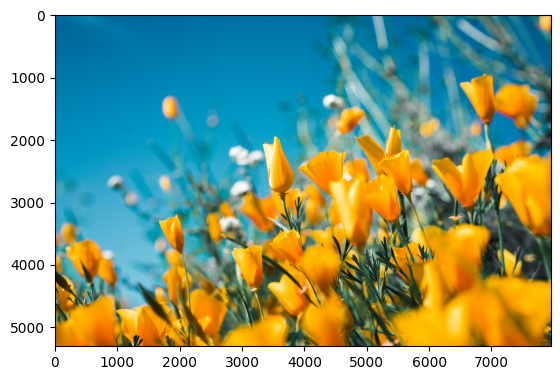

In [9]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()

### 3> 이미지 크기

In [10]:
image_rgb.shape

(5304, 7952, 3)

### 4> 흑백이미지로 바꾸기

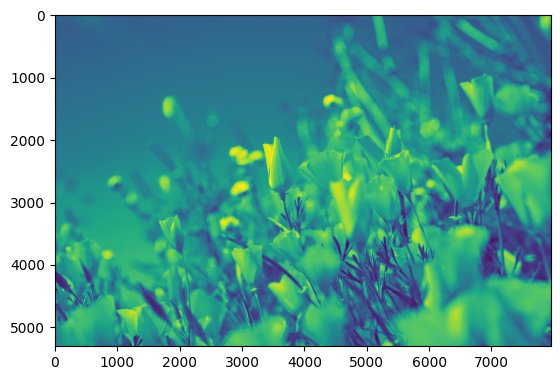

In [11]:
#
# 컬러이미지를 그레이 이미지로 변경하면, 컬러형식을 유지
#

image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray)
plt.show()

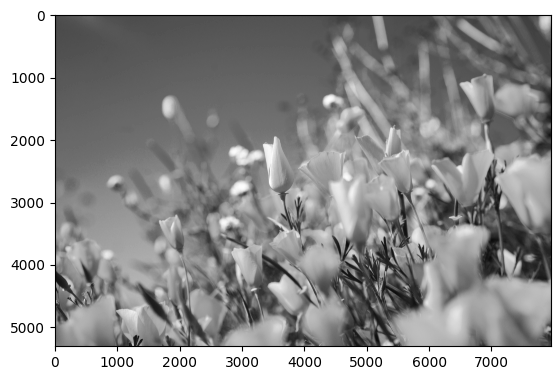

In [12]:
#
# color map을 gray로 변경해서 색상을 변경
#
plt.imshow(image_gray,cmap='gray')
plt.show()

In [13]:
image_gray.shape

(5304, 7952)

## [4] 이미지의 잡음 제거하기 (Gaussian filter)

In [15]:
# remove noise
blur_gray_image = cv2.GaussianBlur(image_gray,(3,3),0)

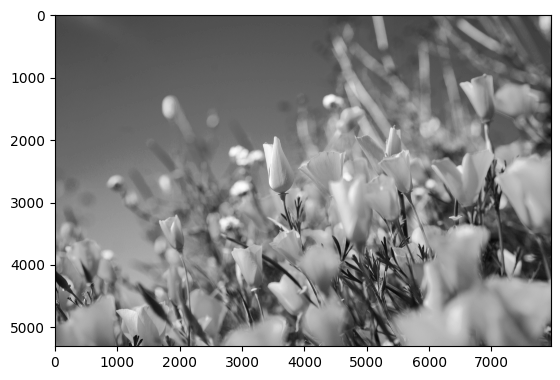

In [16]:
_ = plt.imshow(blur_gray_image,cmap='gray')

## [5] Canny 필터링

In [17]:
# Using the Canny filter to get contours
blur_gray_image = cv2.GaussianBlur(image_gray,(5,5),0)
edges = cv2.Canny(blur_gray_image, 20, 30)

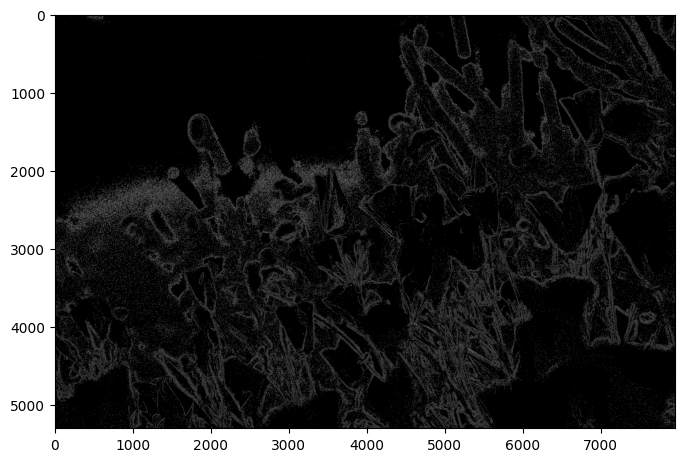

In [18]:
_ = plt.figure(figsize=(8,6))
_ = plt.imshow(edges,cmap='gray')

## [6] 히스토그램

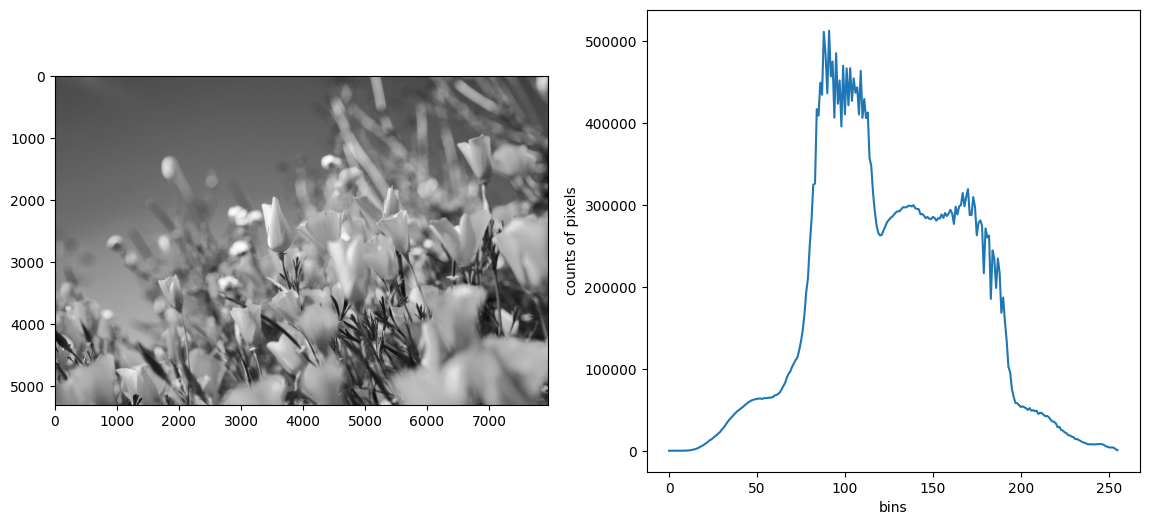

In [19]:
hist = cv2.calcHist([image_gray],[0],None,[256],[0,256])

_ = plt.figure(figsize=(14,6))
_ = plt.subplot(1,2,1)
_ = plt.imshow(image_gray,cmap='gray')

_ = plt.subplot(1,2,2)
_ = plt.xlabel("bins")
_ = plt.ylabel("counts of pixels")
_ = plt.plot(hist)

### [7] 이미지 크기 변환하기

> OpenCV의 resize()함수를 사용해서 이미지의 크기를 변환




In [20]:
# 높이와 넓이를 60%로 스케일 다운 

width = int(image_gray.shape[1] * 0.6)
height = int(image_gray.shape[0] * 0.6)

resized_gray_image = cv2.resize(image_gray, (width, height), interpolation = cv2.INTER_AREA)

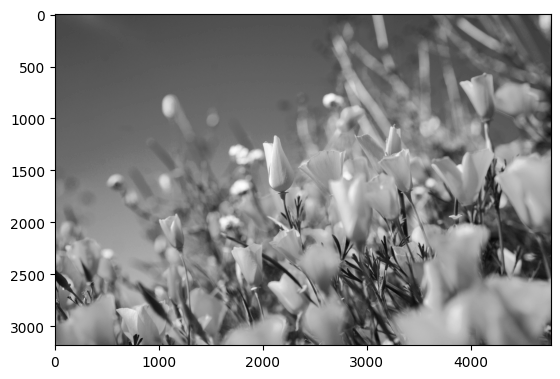

In [21]:
_ = plt.imshow(resized_gray_image,cmap='gray')

In [22]:
print("원래 흑백이미지의 크기(height,width) = ",image_gray.shape)
print("크기변환 흑백미이지의 크기(height,width) = ",resized_gray_image.shape)

원래 흑백이미지의 크기(height,width) =  (5304, 7952)
크기변환 흑백미이지의 크기(height,width) =  (3182, 4771)


## [8] 이미지 뒤집기

In [23]:
# x축을 기준으로 뒤집기
flipped_byx_gray_image = cv2.flip(image_gray,0)

# y축을 기준으로 뒤집기 
flipped_byy_gray_image = cv2.flip(image_gray,1)

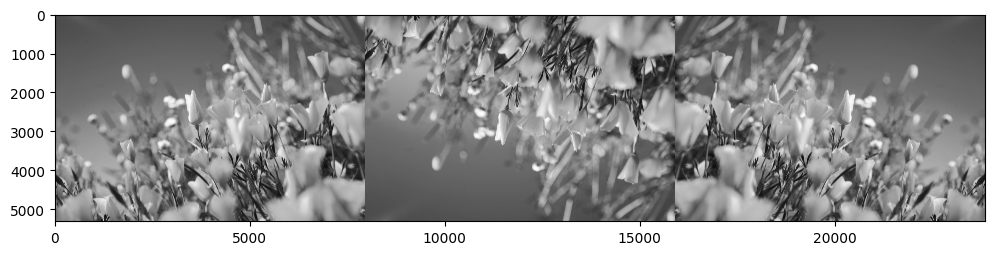

In [24]:
# 이미지 병합하기
images = np.hstack((image_gray, flipped_byx_gray_image, flipped_byy_gray_image))

_ = plt.figure(figsize=(12,8))
_ = plt.imshow(images,cmap='gray')

## [9] 이미지 이진화하기

In [27]:
#
# 100이하는 흑백, 100이상은 화이트로 이진화하기
#
threshold_value = 160
threshold_above_color = 255 # white

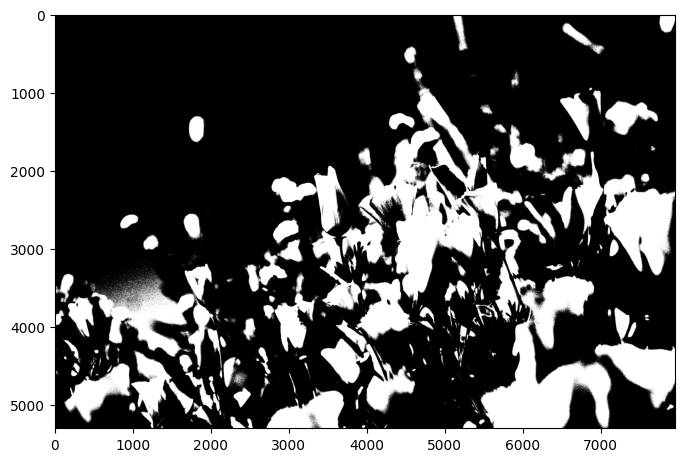

In [28]:
threshed_image = cv2.threshold(image_gray, threshold_value, threshold_above_color, cv2.THRESH_BINARY)[1]
_ = plt.figure(figsize=(8,6))
_ = plt.imshow(threshed_image,cmap='gray')

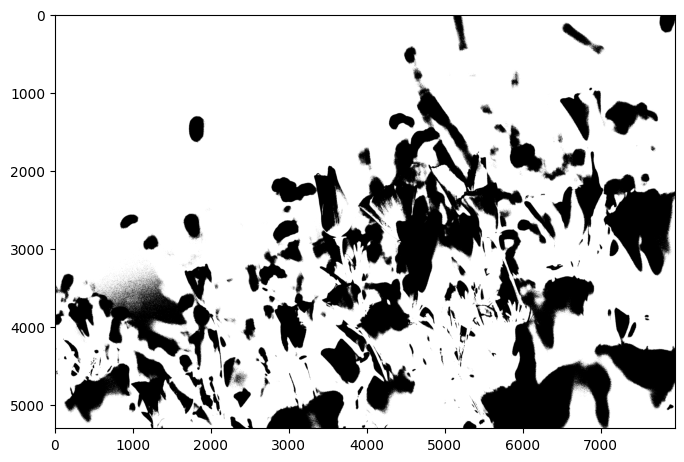

In [29]:
#
# INVERSE로 이진화 이미지값 보기
#

threshed_image = cv2.threshold(image_gray, threshold_value, threshold_above_color, cv2.THRESH_BINARY_INV)[1]
_ = plt.figure(figsize=(8,6))
_ = plt.imshow(threshed_image,cmap='gray')

## [10] 이미지 마스킹(masking) 하기

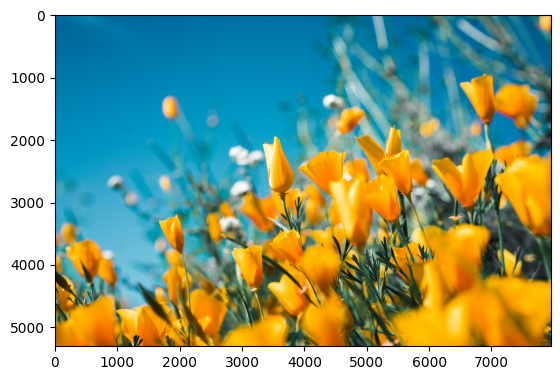

In [30]:
_ = plt.imshow(image_rgb)

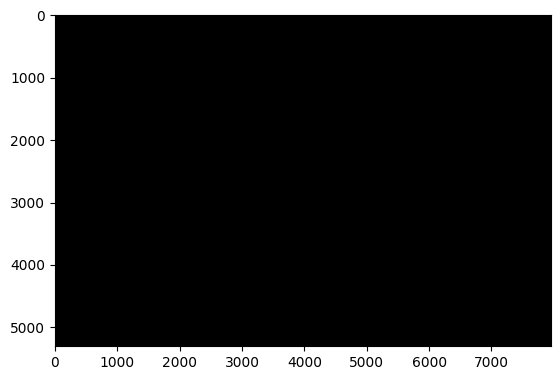

In [31]:
### 1> 이미지 크기와 동일한 mask만들기 

mask_image = np.zeros_like(image_rgb)
plt.imshow(mask_image)

### 2> 마스크 이미지에서 보여질 영역 지정하기

In [32]:
mask_image.shape

(5304, 7952, 3)

In [33]:
# 원을 그릴 공간의 중심 포인트를 찾습니다
width=round(mask_image.shape[1]/2)
height=round(mask_image.shape[0]/2)
center_coordinates = (width,height)
  
# Radius of circle 
radius = 1200
   
# white color in BGR 
color = (255, 255, 255) 
   
# Line thickness of -1 px 
thickness = -1
   
mask_image2 = cv2.circle(mask_image, 
                        center_coordinates, 
                        radius, 
                        color, 
                        thickness) 

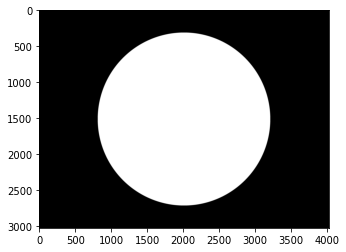

In [ ]:
_ = plt.imshow(mask_image2)

### 3> 원래 이미지와 합하기

* <참고> https://copycoding.tistory.com/156

In [34]:
# bit연산을 수행 (bit_and)

final_composite_image = cv2.bitwise_and(image_rgb, mask_image2)

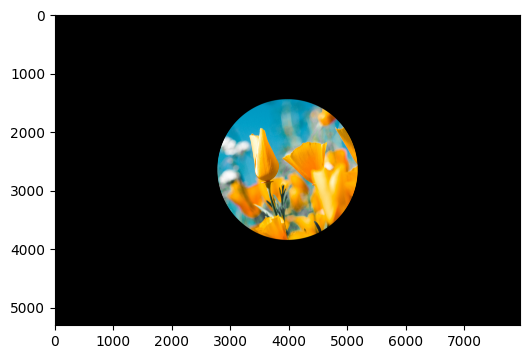

In [35]:
_ = plt.figure(figsize=(6,6))
_ = plt.imshow(final_composite_image)

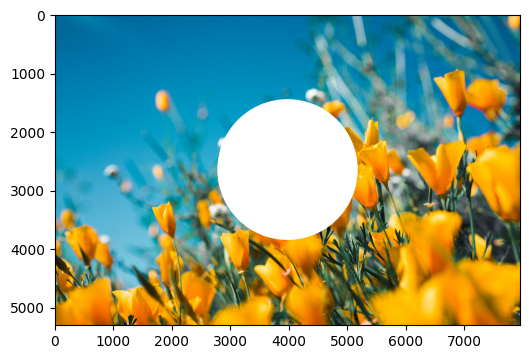

In [36]:
# bit연산을 수행 (bit_or)

final_composite_image2 = cv2.bitwise_or(image_rgb, mask_image2)
_ = plt.figure(figsize=(6,6))
_ = plt.imshow(final_composite_image2)

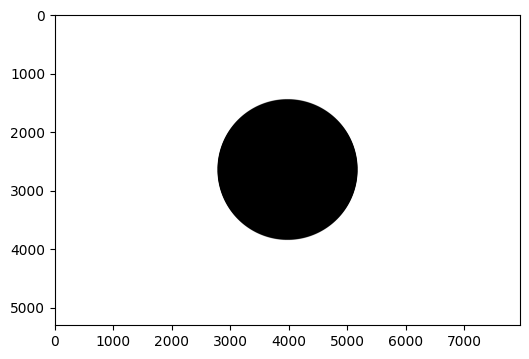

In [38]:
# bit연산을 수행 (bit_not)

final_composite_image4 = cv2.bitwise_not(mask_image2)
_ = plt.figure(figsize=(6,6))
_ = plt.imshow(final_composite_image4)